# IBM Developer Skills Network

# Softmax Classifier with hand written digit from MNIST

In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np

In [3]:
# The function to plot parameters

def PlotParameters(model): 
    W = model.state_dict()['linear.weight'].data
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(2, 5)
    fig.subplots_adjust(hspace=0.01, wspace=0.1)
    for i, ax in enumerate(axes.flat):
        if i < 10:
            
            # Set the label for the sub-plot.
            ax.set_xlabel("class: {0}".format(i))

            # Plot the image.
            ax.imshow(W[i, :].view(28, 28), vmin=w_min, vmax=w_max, cmap='seismic')

            ax.set_xticks([])
            ax.set_yticks([])

        # Ensure the plot is shown correctly with multiple plots
        # in a single Notebook cell.
    plt.show()

In [4]:
# Plot the data

def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
    plt.title('y = ' + str(data_sample[1]))

# Make some Data

In [5]:
train_dataset = dsets.MNIST(root='.data', train=True, download=True, transform=transforms.ToTensor())

print("Print the training dataset:\n ", train_dataset)

9913344it [03:10, 52080.14it/s]


Extracting .data\MNIST\raw\train-images-idx3-ubyte.gz to .data\MNIST\raw



29696it [00:00, 390713.68it/s]           


Extracting .data\MNIST\raw\train-labels-idx1-ubyte.gz to .data\MNIST\raw



1649664it [00:19, 83135.25it/s]                             


Extracting .data\MNIST\raw\t10k-images-idx3-ubyte.gz to .data\MNIST\raw



5120it [00:00, 5120371.12it/s]          
C:\Users\hp\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting .data\MNIST\raw\t10k-labels-idx1-ubyte.gz to .data\MNIST\raw

Processing...
Done!
Print the training dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: .data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [6]:
# Create and print the validating dataset
validation_dataset = dsets.MNIST(root='./data',download=True, transform=transforms.ToTensor())
print("Print the validating dataset:\n ", validation_dataset)

Print the validating dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [7]:
# Print the type of the element

print("Type of data element: ", type(train_dataset[0][1]))

Type of data element:  <class 'int'>


In [8]:
# Print the label

print("The label: ", train_dataset[3][1])

The label:  1


The image:  None


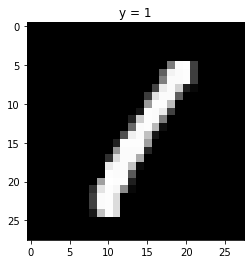

In [9]:
# Plot the image

print("The image: ", show_data(train_dataset[3]))

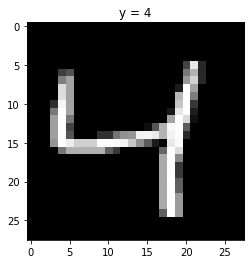

In [10]:
show_data(train_dataset[2])

# Build a Softmax Classifier

In [15]:
class SoftMax(nn.Module):

    # Constructor
    def __init__(self, input_size, output_size):
        super(SoftMax, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    # Prediction
    def forward(self, x):
        z = self.linear(x)
        return z

In [17]:
# Shape of the train dataset
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [18]:
# Defne input and output size
input_dim = 28 * 28
output_dim = 10

In [19]:
# Define the classifier, criterior, optimizer and train
model = SoftMax(input_dim, output_dim)
print('model is ', model)

model is  SoftMax(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


In [23]:
print(train_dataset[0][1])  # 1 index is label, 0 index is image

5


In [24]:
# Print the parameters

print('W: ',list(model.parameters())[0].size())
print('b: ',list(model.parameters())[1].size())

W:  torch.Size([10, 784])
b:  torch.Size([10])


Each weight is an image corresponding to a number (0-9)

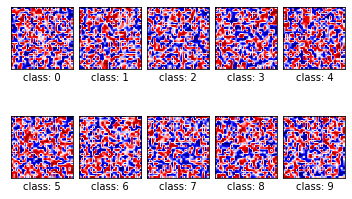

In [25]:
# Plot the model parameters for each class

PlotParameters(model)

In [27]:
# Define the learning rate, optimizer, criterion and dataloader

learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

In [28]:
# Train the model

n_epochs = 10
loss_list = []
accuracy_list = []
N_test = len(validation_dataset)

def train_model(n_epochs):
    for epoch in range(n_epochs):
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
        
        correct = 0
        for x_test, y_test in validation_loader:
            z = model(x_test.view(-1, 28*28))
            _, yhat = torch.max(z.data,1)
            correct += (yhat == y_test).sum().item()

        accuracy = correct / N_test
        loss_list.append(loss.data)
        accuracy_list.append(accuracy)

train_model(n_epochs)

# Analyze the results

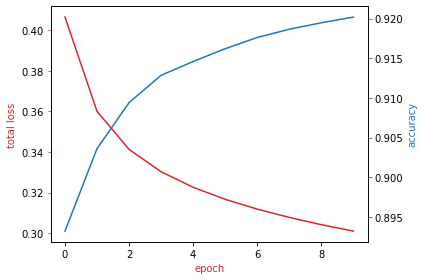

In [29]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

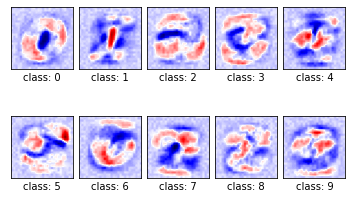

In [30]:
# Plot the parameters

PlotParameters(model)

Weight becomes simimlar to each image class

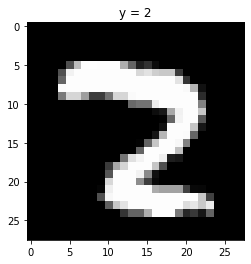

yhat: tensor([7])
probability of class  0.6816790699958801


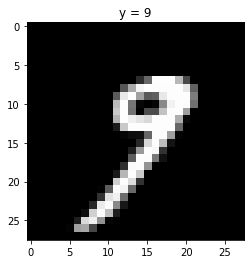

yhat: tensor([7])
probability of class  0.710830569267273


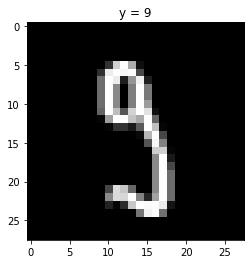

yhat: tensor([5])
probability of class  0.71859210729599


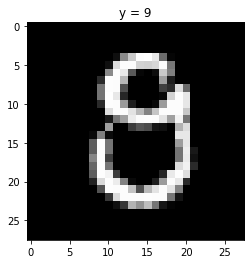

yhat: tensor([8])
probability of class  0.37276700139045715


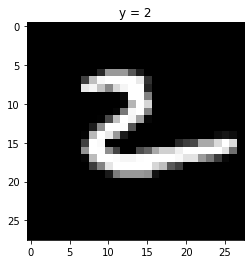

yhat: tensor([6])
probability of class  0.49157533049583435


In [31]:
# Plot the misclassified samples
Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat != y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break       

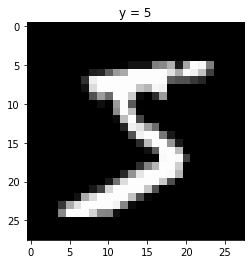

yhat: tensor([5])
probability of class  0.8506284952163696


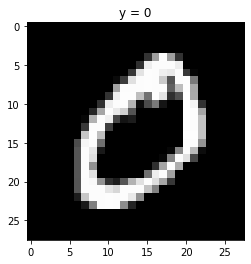

yhat: tensor([0])
probability of class  0.9997333884239197


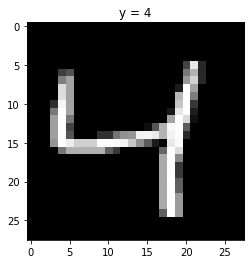

yhat: tensor([4])
probability of class  0.8780151009559631


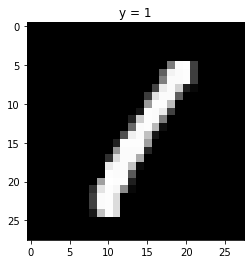

yhat: tensor([1])
probability of class  0.9638084173202515


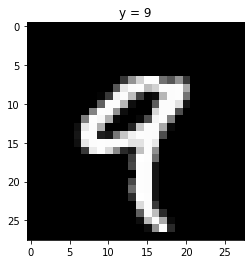

yhat: tensor([9])
probability of class  0.9267657399177551


In [32]:
# Plot the classified samples
Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat == y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break  